# EDA: Regresión Dataset Treasury

El Dataset de Treasury es un dataset que contiene datos del tesoro estadounidense tomados de forma semanal desde el 1/04/1980 hasta el 2/04/2000. El objetivo de este trabajo es ser capaz de predecir el atributo 1 Month CD Rate para una muestra de datos del tesoro dada.

Nuestro primer paso necesario para empezar a trabajar es importar los datos. Estos nos han sido dados y tenemos ademas las particiones necesarias para realizar un 5-fold cross validation. Sin embargo para la parte de EDA nos interesa trabajar con todos el conjunto de datos completo. El formato de los datos es el propio de la plataforma Keel de la UGR. Sin embargo este formato es muy similar al formato .Arff así que podemos leer estos archivos como si se trataran de un .Arff usando el paquete foreign de R

In [4]:
library(tidyverse)
library(foreign)
library(ggplot2)
library(stats)
library(DataExplorer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
 library("corrplot")

 library(FactoMineR)
 library(factoextra)
 library(glmnet)
 library(skimr)
 library(Hmisc)


corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [6]:
data <- read.arff("rawdata/treasury/treasury.dat")


Una vez tenemos nuestros datos vamos a proceder a explorar los datos que tenemos. Una entrada del dataset esta compuesta por una unión de 16 columnas, todas ellas numericas. Y tenemos un total de 1049 entradas, vamos a explicar 1 a 1 el significado de las 16 columnas para poder plantear hipotesis sobre como afectan estas a la variable que queremos predecir. Estos datos se basan principalmente en conceptos economicos. Procedemos a explicar estas caracteristicas. Hemos extraido esta información de la pagina de donde se ha obtenido el dataset

-  1-year Treasury Constant Maturity rate
    Este dato se refiere a los rendimientos del bono del tesoro a 1 año vista. Es decir que ratio de interes genera una inversión en bonos del tesoro a 1 año para esa semana concreta asumiendo que el inversor guarde el bono durante todo ese año. El dominio de este campo dentro de nuestro dataset es [77.055, 142.645] como se indica en la pagina oficial del Keel
- 30-Year Conventional Mortgage Rate
    Este dato se refiere al ratio de interes asociado una hipoteca convencional que se vence a 30 años para esa semana concreta. El dominio de este campo dentro de nuestro dataset es [3.02, 17.15]
- 3-Month Treasury Bill Rate-Auction Average
    Este dato se refiere al rendimiento medio de un bono del tesoro comprado en subasta oficial a 3 meses vista.  El dominio de este campo dentro de nuestro dataset es [6.49, 18.63]	
- 3-Month Treasury Bill Rate-Secondary Market
    Idem que el anterior pero cuando el bono es comprado en el mercado secundario.  El dominio de este campo dentro de nuestro dataset es [2.67, 16.75]
- 3-Year Treasury Constant Maturity Rate
    Idem que el 1-year Treasury Constant Maturity rate pero asumiendo el rendimiento a 3 años. El dominio de este campo dentro de nuestro dataset es [2.69, 16.76]
- 5-Year Treasury Constant Maturity Rate
    Idem que el anterior pero a 5 años. El dominio de este campo dentro de nuestro dataset es [4.09, 16.47]
- Bank Credit of All Commercial Banks
    Este campo se refiere a la cantidad total de dinero que los bancos comerciales pueden prestar para esa semana concreta. El dominio de este campo dentro de nuestro dataset es [4.17, 16.13]
- Currency Component of Money Stock
    Este campo se refiere a la cantidad de dinero en monedas y billetes que hay en circulación esa semana concreta. El dominio de este campo dentro de nuestro dataset es [1130.9, 4809.2]
- Demand Deposits at Commercial Banks
    Este campo se refiere a la cantidad de dinero almacenada en bancos lista para ser retirada instantaneamente en una semana concreta. El dominio de este campo dentro de nuestro dataset es [105.6, 533.0]
- Effective Federal Funds Rate
    Este campo es algo mas complicado, se refiere a la mediana del conjunto de ratios de interes por el cual durante la noche las entidades capaces de almacenar dinero se prestan dinero entre ellas. Esto ocurre todas las noches. Y al estar cada entrada de este dataset tomado mensualmente. El dominio de este campo dentro de nuestro dataset es [225.8, 412.1]
- M1 Money Stock
    Este campo se refiere al total del dinero fuera de las reservas oficiales del tesoro estadounidense, los depositos de demanda en bancos comerciales (un campo que si nos fijamos ya tenemos), depositos de ahorros y otras fuentes de liquidez. El dominio de este campo dentro de nuestro dataset es [2.86, 20.06]
- Total Checkable Deposits
    Se refiere al dinero total almacenado en cuentas de las cuales se pueden retirar cheques en esa semana concreta. El dominio de este campo dentro de nuestro dataset es [381.1, 1154.1]
- Total Loans and Leases of All Commercial Banks
    Se refiere al total del dinero prestado por todos los bancos comerciales para una semana concreta. El dominio de este campo dentro de nuestro dataset es de [269.9, 803.4]
- Total Savings Deposits
    El dinero total en cuentas de ahorro para una semana concreta. El dominio de este campo dentro de nuestro dataset es de  [868.1, 3550.3]
- Trade Weighted Exchange Index Major Currencies
    Este campo es un indice que representa el valor internacional del dolar y las mayores divisas en el comercio para una semana concreta. El dominio de este campo dentro de nuestro dataset es de [175.6, 1758.1]
- 1-Month CD Rate
    Finalmente, el campo que queremos poder predecir. Se refiere al ratio de interes a un mes de una CD. Una CD o Certificate Deposit es un producto financiero en el cual un inversor puede invertir con la condición que durante el periodo que se estipule al comprarlo no podra retirar el dinero. El Dominio de este campo dentro de nuestro dataset es de [3.02, 20.76]

## Procesamiento de los datos

Este es un dataset bastante cómodo para trabajar, puesto que no contamos con muchos problemas a la hora de formateado. El dataset no tiene valores perdidos. Ni tampoco tiene entradas de tipos fecha o cosas que nos pidan formatear de una forma especifica. Todos nuestros datos son de tipo númerico y no hay ninguno que a priori se pueda entender como categorico de un primer vistazo. Más adelante estudiaremos cada variable una a una para ver si no se diera el caso. Podemos comprobar utilizando la función duplicated() que efectivamente tampoco tiene valores duplicados. Lo mas relevante que podemos observar a priori es que los datos se encuentran en escalas muy diferentes. Por tanto nos interesa realizar una transformación de normalización teniendo en cuenta que para la regresión utilizaremos modelos lineales simples que son muy sensibles a la escala de los datos. Esto lo haremos sin embargo más adelante despues de analizar algunas estadisticas descriptivas de los datos.

In [4]:
length(data[duplicated(data)])

[1] 0

## Formulado de hipotesis

- Al tratarse de datos economicos y concretamente datos que representan ratios de interes a diferentes tiempo es bastante probable que los datos esten bastante correlados entre si, y por tanto tendremos seguramente que eliminar unas cuantas variables
- Como consecuencia de la hipotesis anterior es probable que exista cierta linealidad entre todos los datos y la salida. Puesto que estas metricas se diseñaron para ser capaces de inferir la información economica. La clave entonces sera saber seleccionar los que tienen una linealidad más fuerte o los que nos aporten más información
- 

## Resumen de los datos

### Analisis univariable

Estudiaremos una a una las variables. Para ello primero veremos un par de resumenes estadistico del dataset para observar si a priori hay algo extraño que merezca la pena ver en detenimiento

In [12]:
describe(data)

data 

 16  Variables      1049  Observations
--------------------------------------------------------------------------------
1Y-CMaturityRate 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1049        0     1029        1    97.35    15.42    82.06    83.86 
     .25      .50      .75      .90      .95 
   86.80    92.53   104.74   120.39   128.10 

lowest : 77.055  77.09   77.298  77.349  77.751 
highest: 139.647 140.985 142.364 142.527 142.645
--------------------------------------------------------------------------------
30Y-CMortgageRate 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1049        0      603        1    7.544    3.364    3.530    4.222 
     .25      .50      .75      .90      .95 
   5.450    6.710    9.030   12.240   14.382 

lowest : 3.02  3.09  3.15  3.16  3.17 , highest: 16.63 16.74 16.93 17.07 17.15
--------------------------------------------------------------------------------
3M-Rate-AuctionAver

In [18]:
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1049  
Number of columns          16    
_______________________          
Column type frequency:           
  numeric                  16    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable           n_missing complete_rate    mean      sd      p0
 1 1Y-CMaturityRate                0             1   97.4    14.5    77.1 
 2 30Y-CMortgageRate               0             1    7.54    3.11    3.02
 3 3M-Rate-AuctionAverage          0             1   10.4     2.96    6.49
 4 3M-Rate-SecondaryMarket         0             1    6.85    2.95    2.67
 5 3Y-CMaturityRate                0             1    6.83    2.94    2.69
 6 5Y-CMaturityRate                0             1    8.12    2.88    4.09
 7 bankCredit                      0          

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


De forma directa no encontramos nada que no sepamos ya en los resumenes estadisticos. No hay valores perdidos,las variables estan en escalas muy diferentes y hay variables con dominios muy amplios mientras otras se mueven en intervalos mucho más pequeños. Es interesante visualizar la distribución de todas nuestras variables para comprobar si siguen una distribución normal, que es algo que no hemos podido comprobar con estos resumenes estadisticos. Para ello vamos a obtener un qq plot de todas nuestras variables.

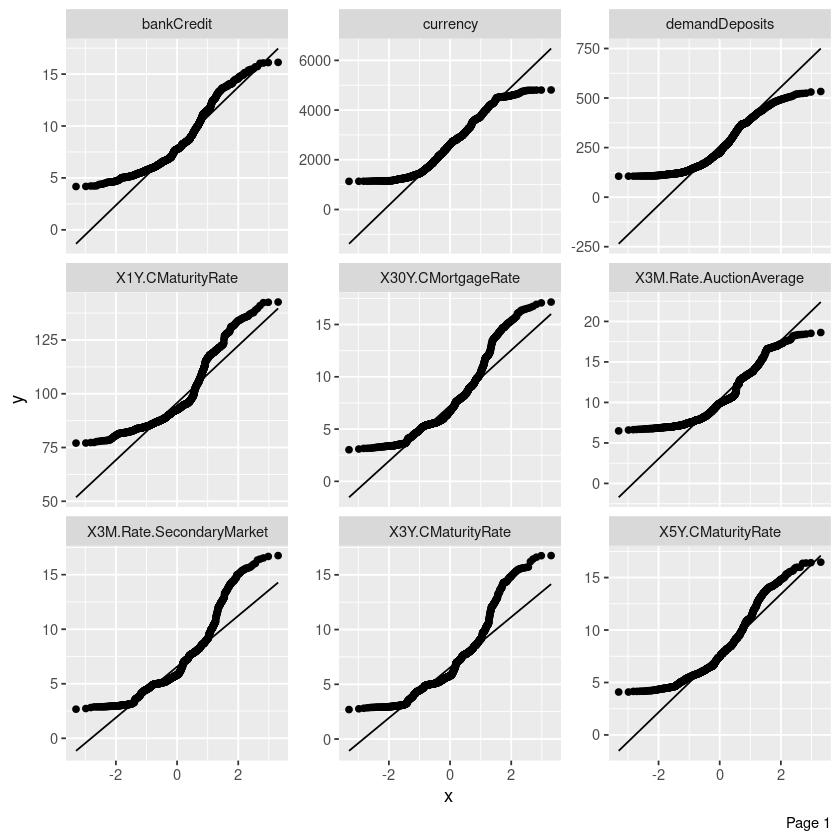

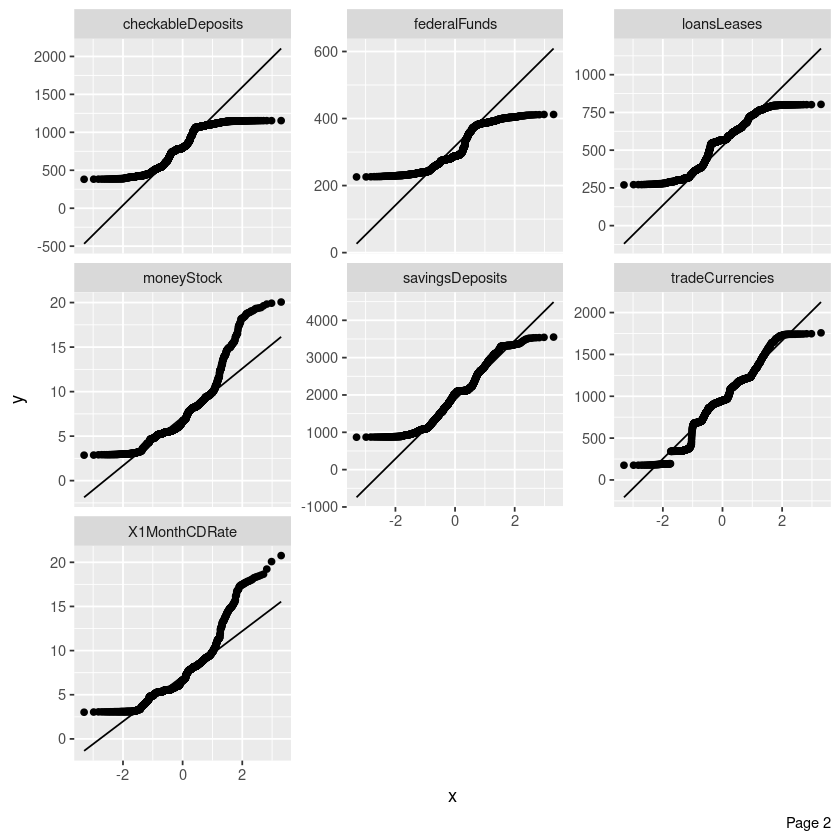

In [14]:
plot_qq(data)

Observamos como la gran mayoria de nuestros datos no se adecuan a una distribución  normal. Sin embargo, otros campos como tradecurrencies parecen si adecuarse mejor salvo por un fenomeno en las colas donde parece que el valor no aumenta. Esto podria ser interesante y pararemos a estudiar más a fondo. Ademas el campo federal funds y en menor medida el campo Checkable deposits parecen seguir una distribución bimodal. Indagando sobre esto. Primero vamos a estudiar la distribución de los campos que parecen bimodales. 

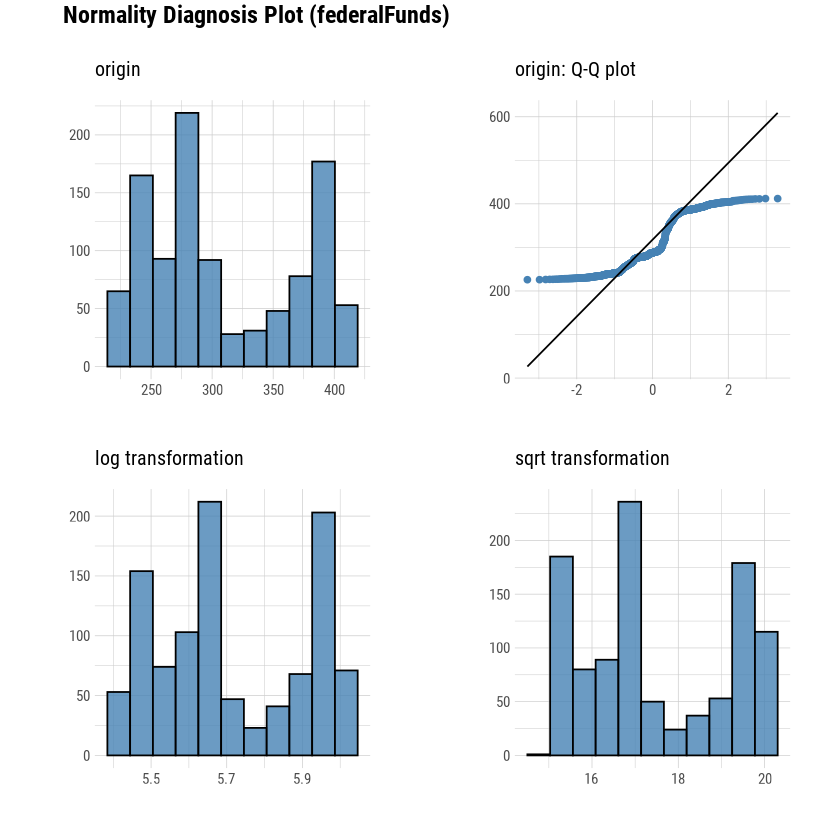

In [19]:
 library(dlookr)
 data %>% plot_normality(federalFunds)

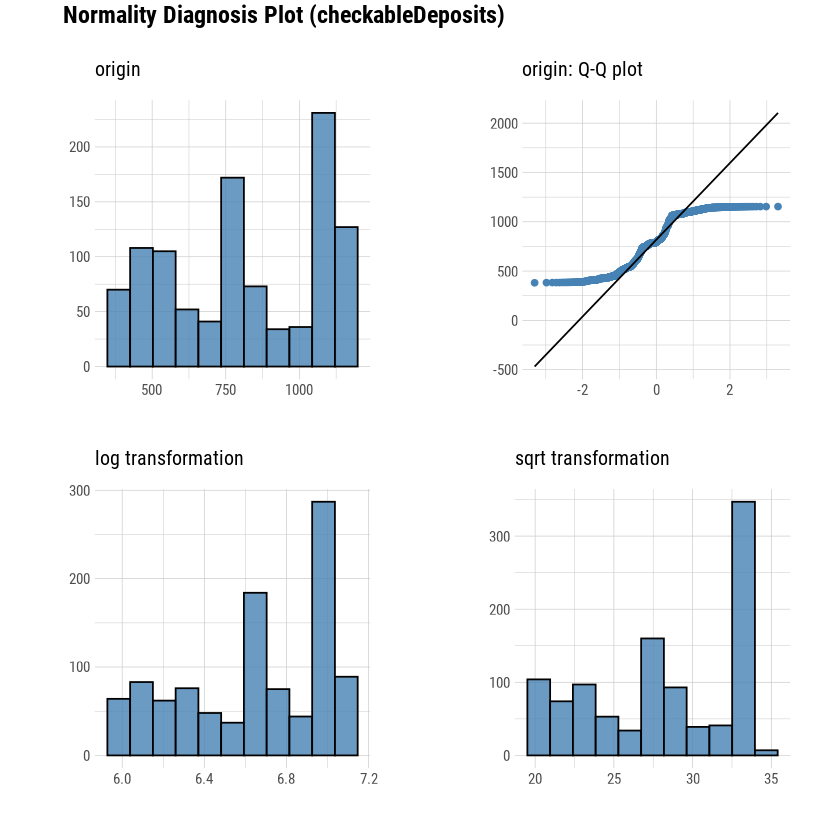

In [20]:
data %>% plot_normality(checkableDeposits)

Podemos observar viendo el histograma como si parece que son distribuciones bimodales. Una solución seria volver estos datos variables categoricas. Pero el problema es uno de regresión donde más adelante se nos pide utilizar regresión lineal y knn para regresión. Que son dos metodos que trabajan mejor con variables numericas. Por tanto decidimos dejarlos como variables numericas

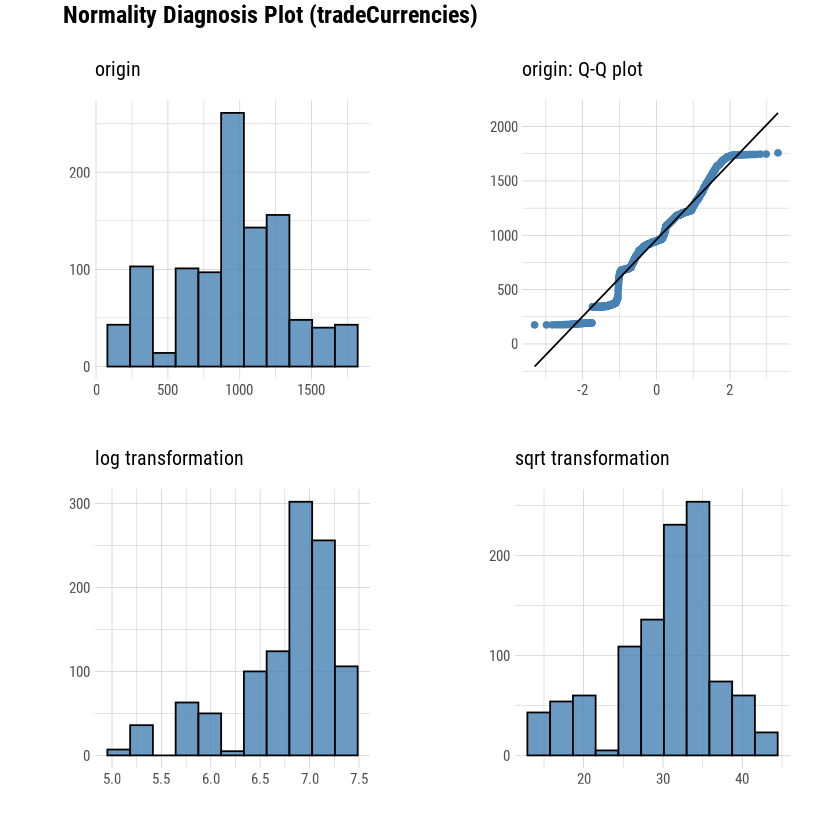

In [21]:
data %>% plot_normality(tradeCurrencies)

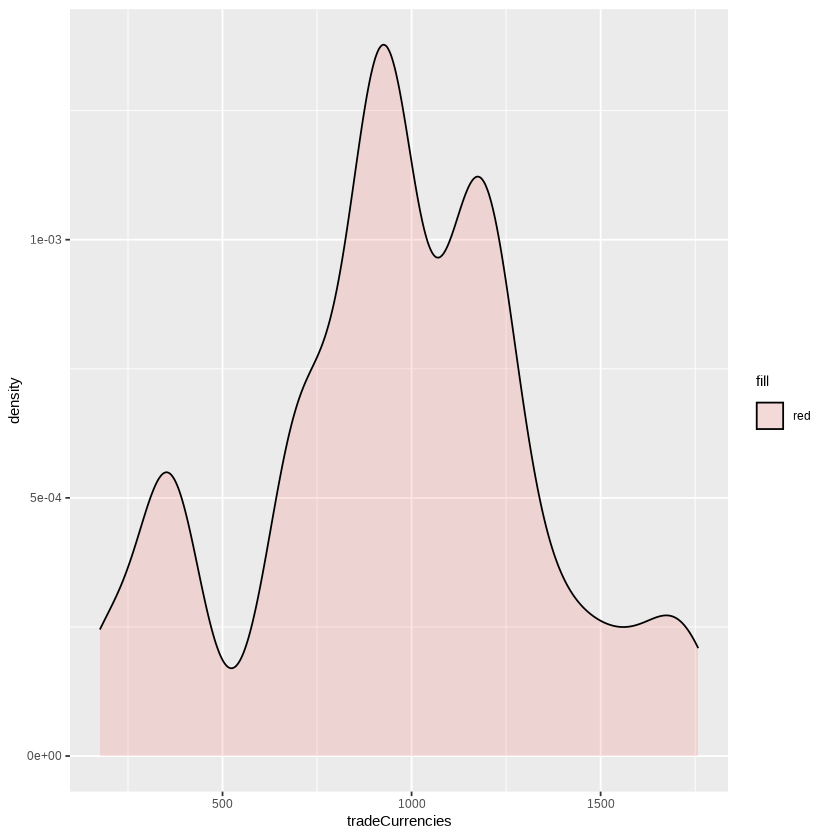

In [23]:
data %>% ggplot(aes(x=`tradeCurrencies`,fill="red"))+ geom_density(stat="density",alpha=I(0.2)) 

En cuanto a esta variable. Viendo el histograma vemos que realmente si sigue más o menos una distribución normal salvo por la presencia de un "hueco" un tramo de la distribución que apenas tiene ejemplos. Podemos pasarlo por un test de normalidad para comprobar si estadisticamente podemos tratarlo como una distribución normal.

In [22]:
 shapiro.test(data$`tradeCurrencies`)


	Shapiro-Wilk normality test

data:  data$tradeCurrencies
W = 0.97042, p-value = 8.633e-14


Haciendo el test de normalidad vemos que el p-value es minusculo y por tanto podemos rechazar la hipotesis nula. Podemos concluir que esta variable no sigue una distribución normal.

A continuación vamos a visualizar la dispersión de nuestros datos. Para ello vamos a visualizar los boxplot de las variables. Tenemos que tener especial cuidado porque tenemos variables con escalas muy diferentes. Por tanto no podemos visualizar todas juntas. 

No id variables; using all as measure variables



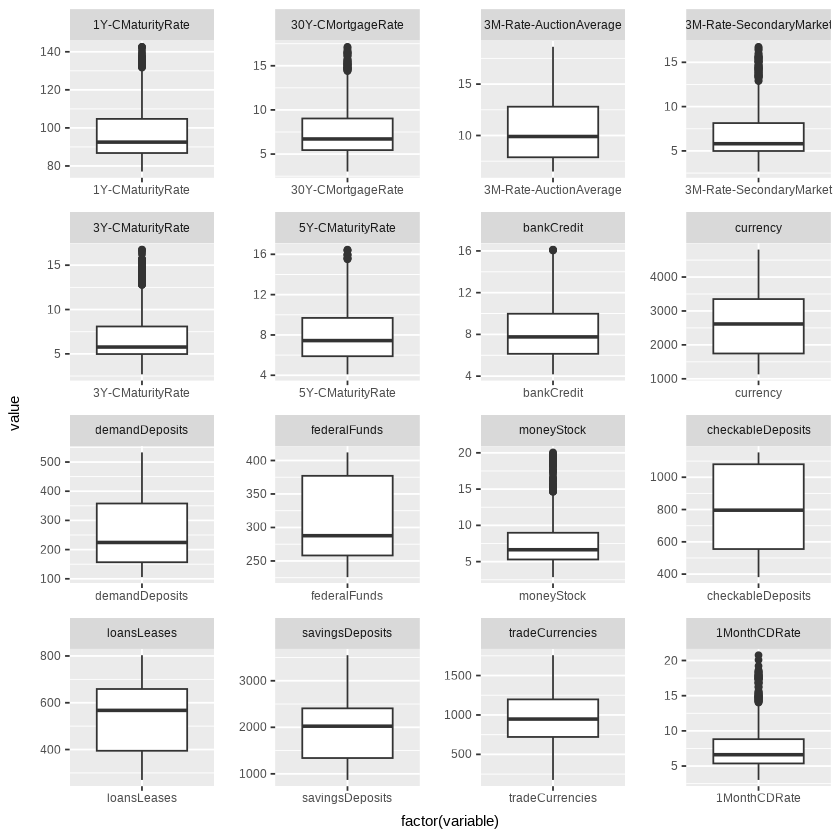

In [31]:
library(reshape2)

meltData<- melt(data)

 ggplot(meltData, aes(factor(variable), value))  + geom_boxplot() + facet_wrap(~variable, scale="free")


Observamos como hay variables con muy poca dispersión como checkableDeposits y otras con una mayor cantidad de dispersión. Una cosa que nos llama la atención es que hay variables que siguen una dispersión practicamente identica con la variable 1MonthCDRate que es la que queremos predecir. Por como se ve la dispersión del dataset tampoco se aprecian outliers evidentes. Y los que se aprecian, se encuentran en la variable a predecir y se encuenra una cantidad similar de outliers en las variables con una dispersión similar. Por tanto podemos pensar que estos outliers nos estan aportando información.

## Graficas bivariables

Vamos a partir de obtener scatter plots que unan la variable de salida con todas las demas, para observar su relación y buscar linealidad para luego seleccionar las mejores variables para el metodo de regresión lineal

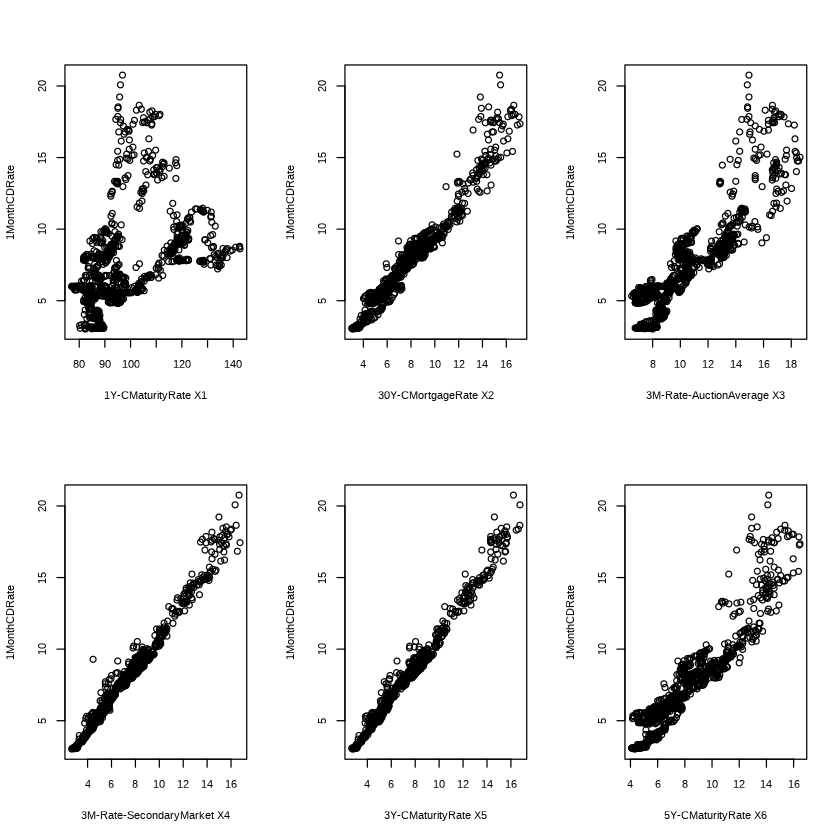

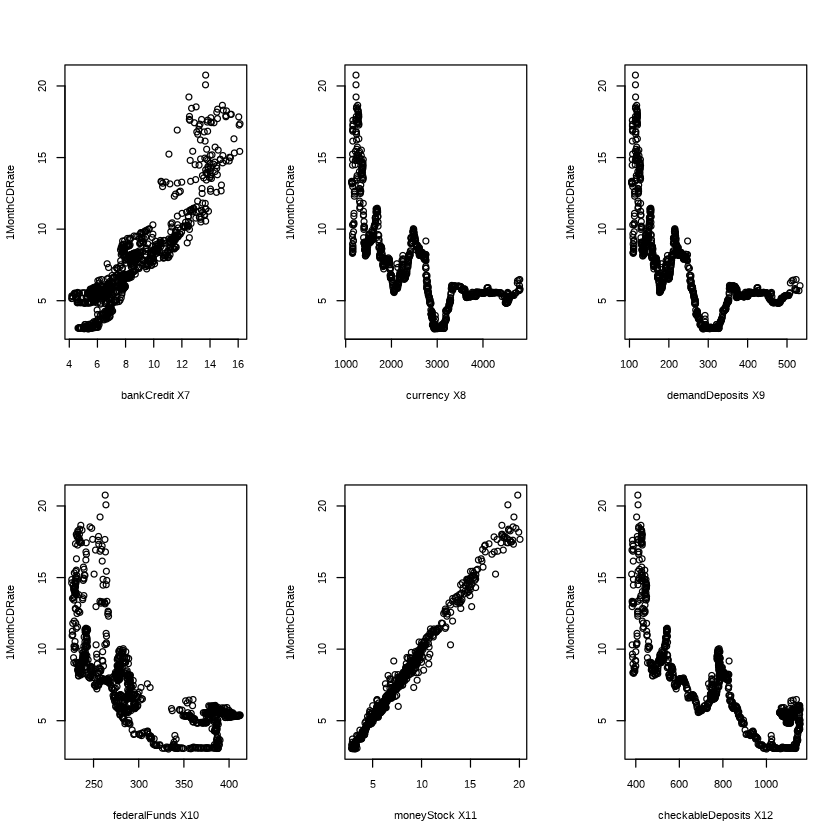

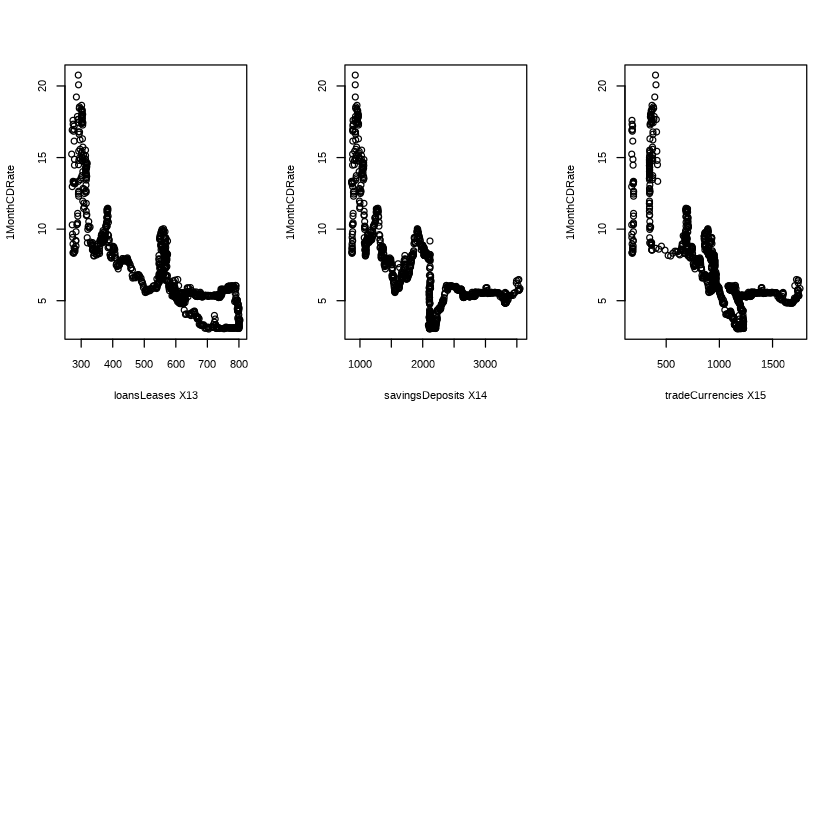

In [39]:
temp <- data
plotY <- function(x, y) {
    plot(temp[, y] ~ temp[, x],
        xlab = paste(names(temp)[x], " X", x, sep = ""),
        ylab = names(temp)[y]
    )
}
par(mfrow = c(2, 3)) # Si margin too large => (2,3)
x <- sapply(1:(dim(temp)[2] - 1), plotY, dim(temp)[2])
par(mfrow = c(1, 1))

Podemos observar visualmente como hay variables que tienen una relación completamente lineal con la variable a predecir. Concretamente las variables MoneyStock 3MRate secondary Market y 3Y Credit maturity rate, Esto las hace muy interesantes para nuestro predictor. Sin embargo es bastante probable que tengan tambien mucha correlación entre ellas. Vamos a estudiar eso en detenimiento. Para ello vamos a obtener una matriz de correlaciones entre todas las variables. De este modo podemos ver no solo la correlación con la salida. Sino correlaciones entre variables que no hayamos percibido

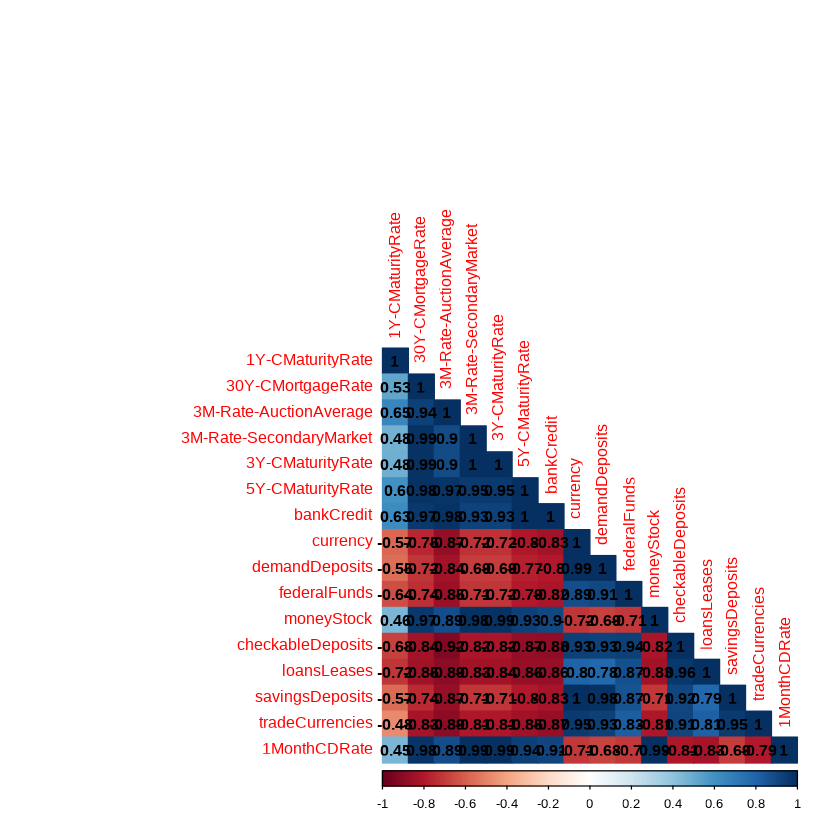

In [40]:
y= cor(data)
corrplot(y, method = "color", addCoef.col = "black", type = "lower")

El resultado es extremadamente interesante pues observamos no solo que efectivamente esas variables tienen una correlacion de mas de 0.98 entre si, sino que practicamente todas las variables estan fuertemente correladas entre si. Esto tiene sus ventajas, pues a la hora de seleccionar variables para la regresión lineal sabemos ya que variables son interesantes utilizar, pero por otro lado es probable que practicamente podamos coger casi cualquier combinación de variables que vamos a obtener un buen modelo, sin embargo estaremos añadiendo mucha información redundante. Nuestra estrategia entonces consiste en tratar de seleccionar con que variables nos aportan más informacion y cuales nos aportan información unica frente al resto. Para ello vamos a realizar un PCA, no con la intención de utilizar la reducción de dimensionalidad, pues para mantener la explicabilidad del modelo nos interesa mantener las variables originales. Sino para ver la contribución de cada variable en cada dimensión y de esa forma visualizar si hay variables que nos ofrezcan información única

In [41]:
datapca <- data %>% select(-`1MonthCDRate`)

mi.pca <- PCA(datapca, scale.unit=TRUE, ncp=4, graph=TRUE)

In [42]:
eig.vals<-get_eigenvalue(mi.pca)

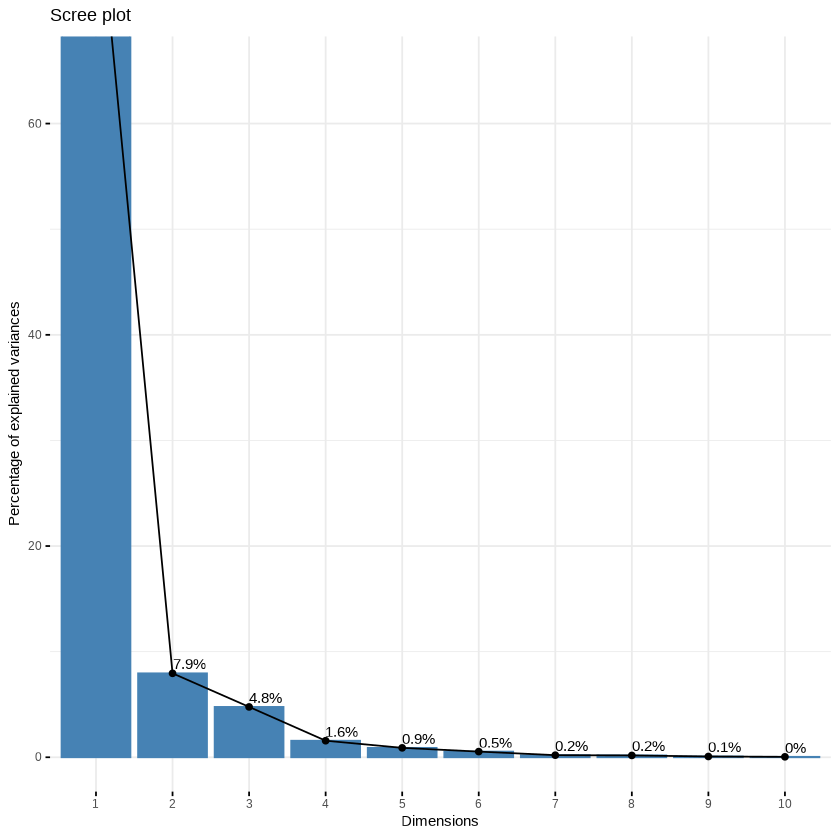

In [43]:
fviz_eig(mi.pca,
addlabels = TRUE,
ylim = c(0, 65))

Podemos ver como tan solo con 2 dimensiones ya obtenemos un 92% de explicabilidad del dataset. Y con 3 ya un 96,8%. Vamos a visualizar cuanto contribuye cada variable en las primeras 4 dimensiones, dond tenemos un 98.4 % de explicabilidad

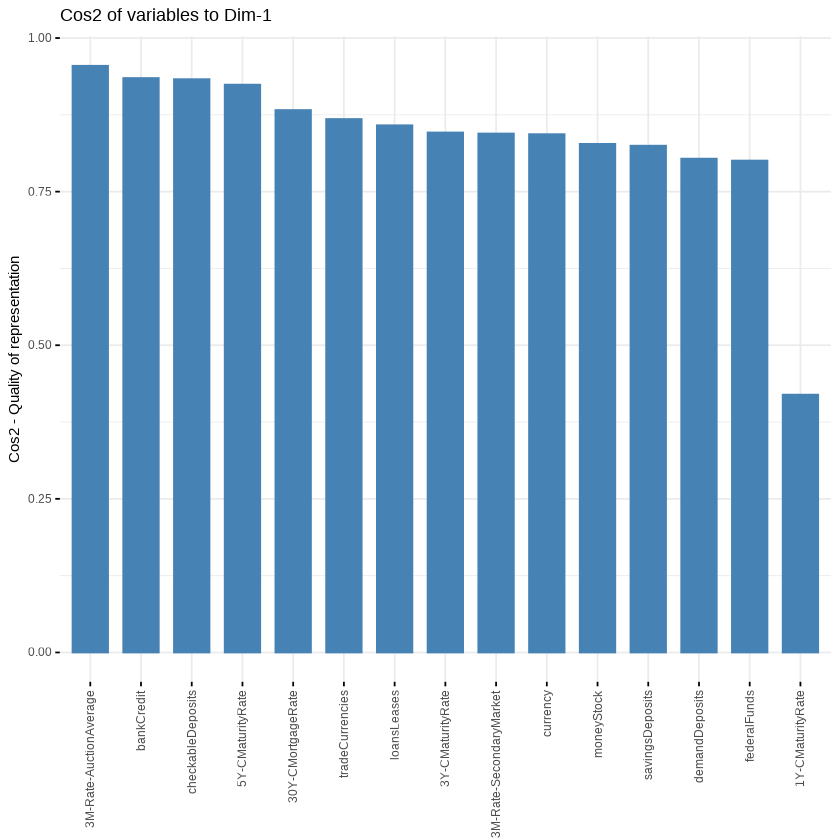

In [55]:
fviz_cos2(mi.pca,
choice = "var",
axes = 1,
xtickslab.rt = 90,
top=16)

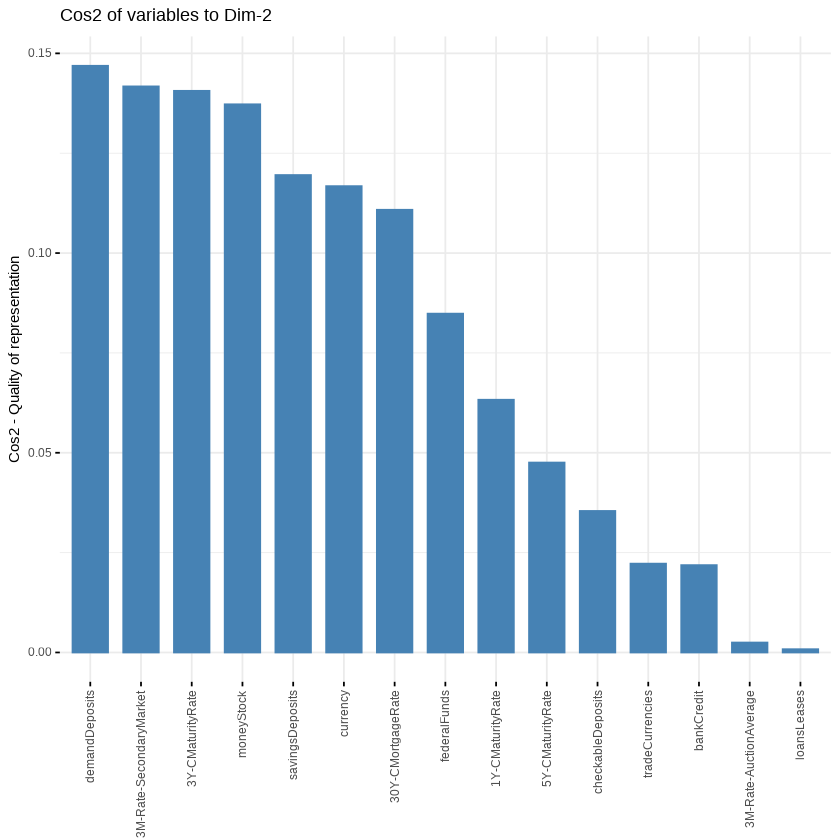

In [46]:
fviz_cos2(mi.pca,
choice = "var",
axes = 2,
xtickslab.rt = 90,
top=16)


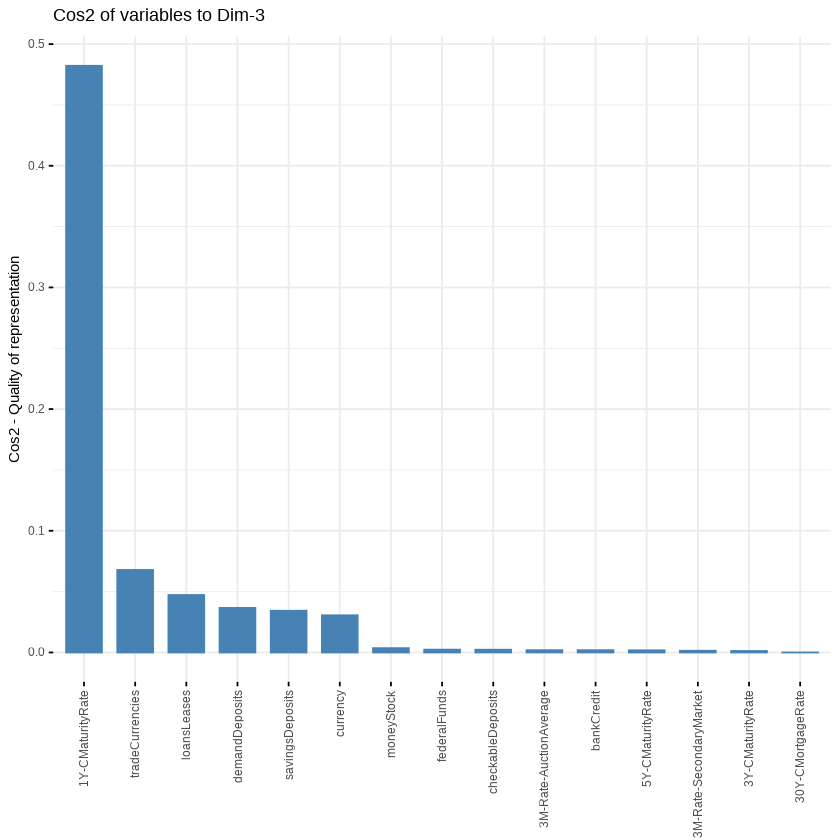

In [47]:
fviz_cos2(mi.pca,
choice = "var",
axes = 3,
xtickslab.rt = 90,
top=16)

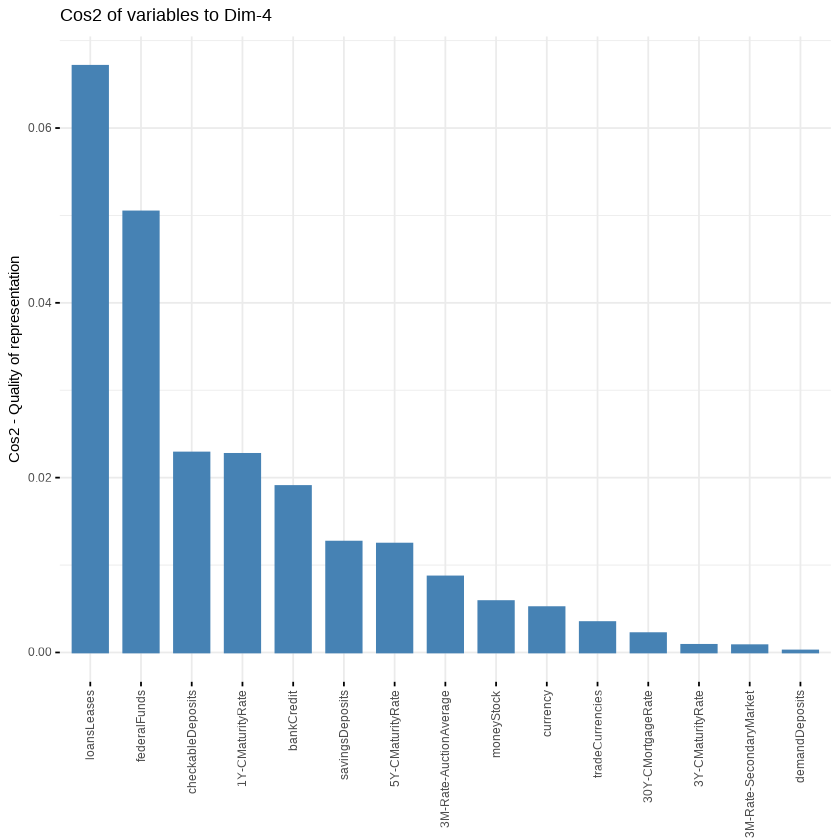

In [63]:
fviz_cos2(mi.pca,
choice = "var",
axes = 4,
xtickslab.rt = 90,
top=16)

Podemos ver que de las variables que estaban tan fuertemente correladas con la salida contribuyen principalmente en las dos primeras dimensiones, donde se explica ya un 92% pero curiosamente no son las mas significativas en cada dimensión. Sino que tienen un valor bastante alto y aceptable en las dos. en ese 8% restante aparecen otras variables como las más significativas. Podemos hacernos una idea entonces de que una buena estrategia seria coger alguna de las variables que expliquen bien las primeras dos dimensiones sabiendo que no necesitamos coger todas porque estan muy correladas entre si y las variables que nos sirvan para explicar ese 8% de información restante Una forma más visual de ver la contribución de cada variable es utilizar un biplot con las dimensiones dos a dos

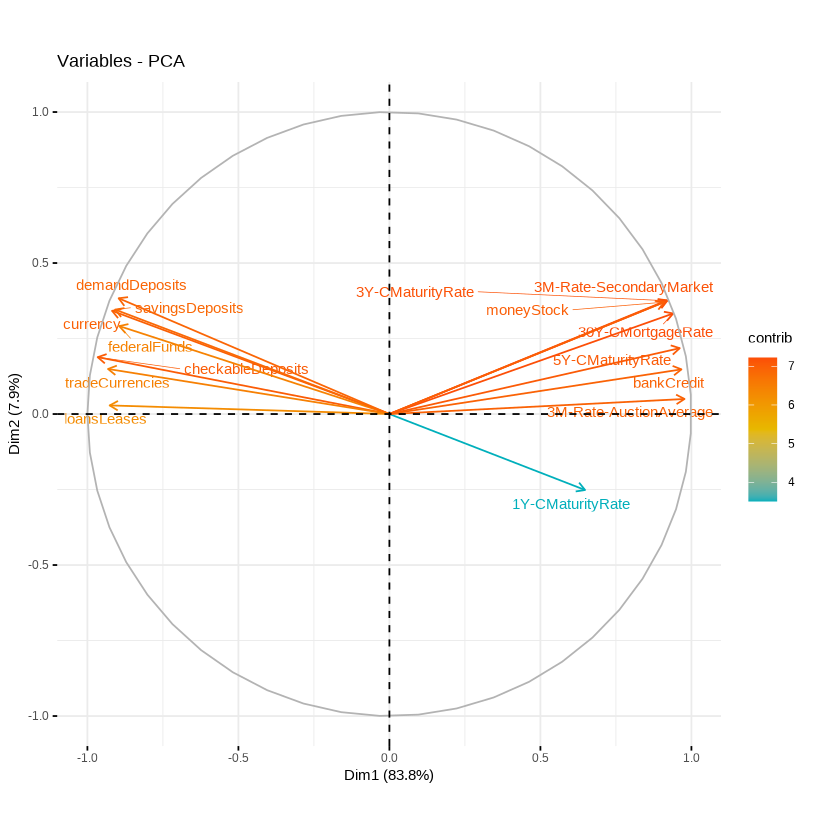

In [57]:
fviz_pca_var(mi.pca,
axes = c(1, 2),
col.var = "contrib",
gradient.cols = c("#00AFBB",
"#E7B800", "#FC4E07"),
repel = TRUE) # Avoid text overlapping

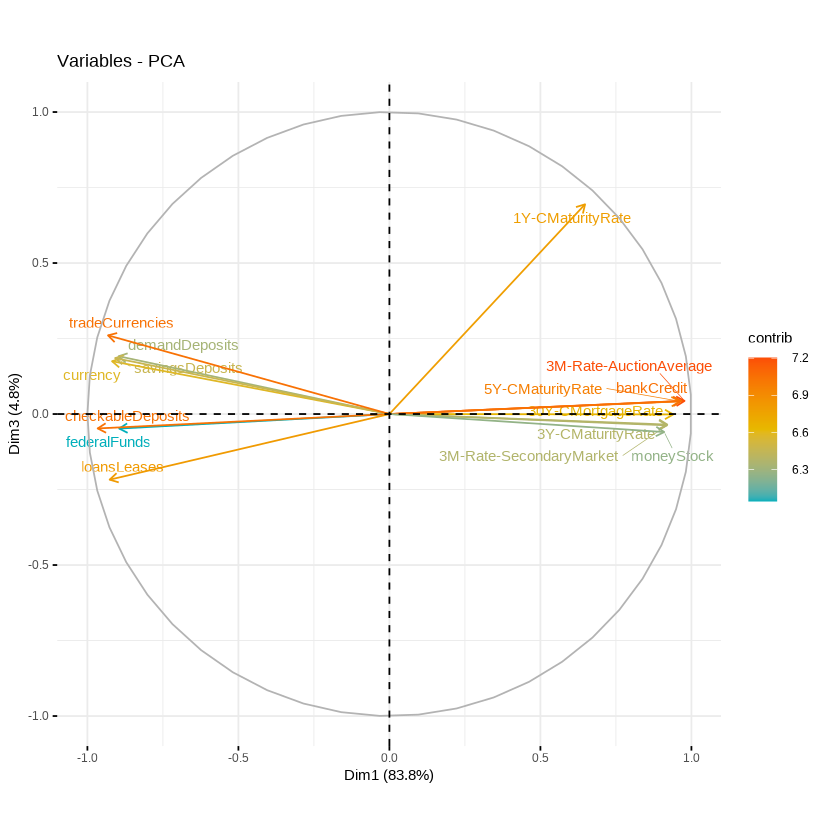

In [58]:
fviz_pca_var(mi.pca,
axes = c(1, 3),
col.var = "contrib",
gradient.cols = c("#00AFBB",
"#E7B800", "#FC4E07"),
repel = TRUE) # Avoid text overlapping

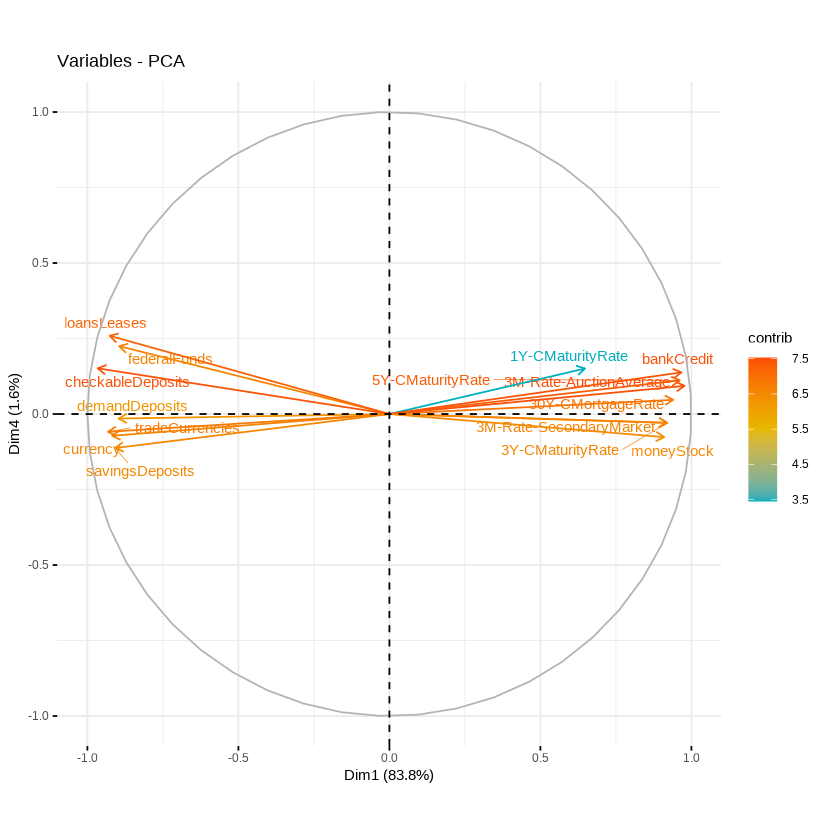

In [59]:
fviz_pca_var(mi.pca,
axes = c(1, 4),
col.var = "contrib",
gradient.cols = c("#00AFBB",
"#E7B800", "#FC4E07"),
repel = TRUE) # Avoid text overlapping

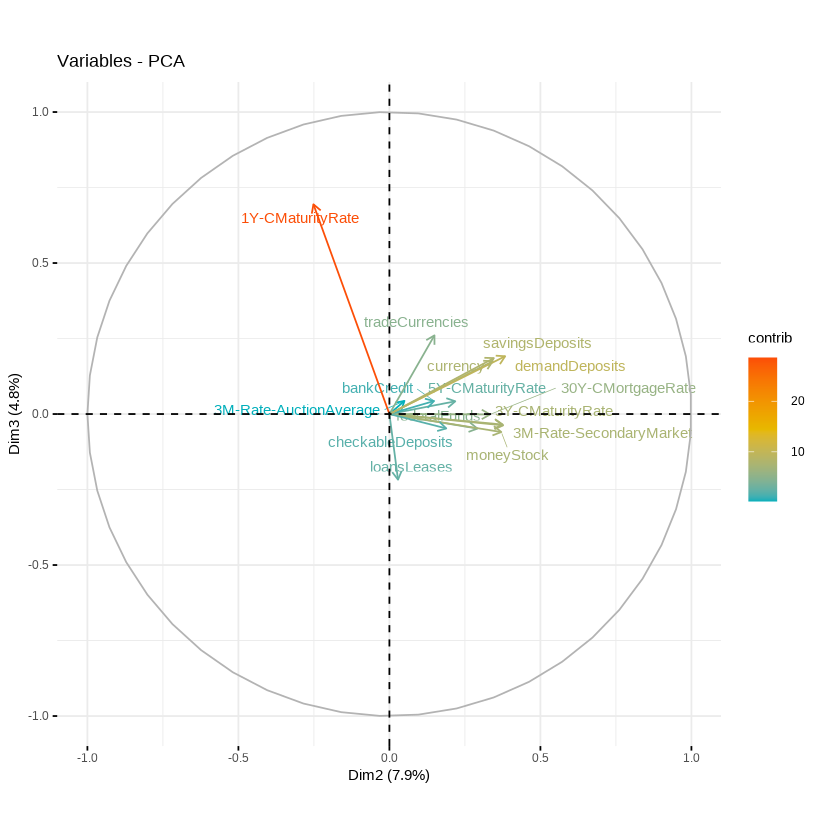

In [60]:
fviz_pca_var(mi.pca,
axes = c(2, 3),
col.var = "contrib",
gradient.cols = c("#00AFBB",
"#E7B800", "#FC4E07"),
repel = TRUE) # Avoid text overlapping

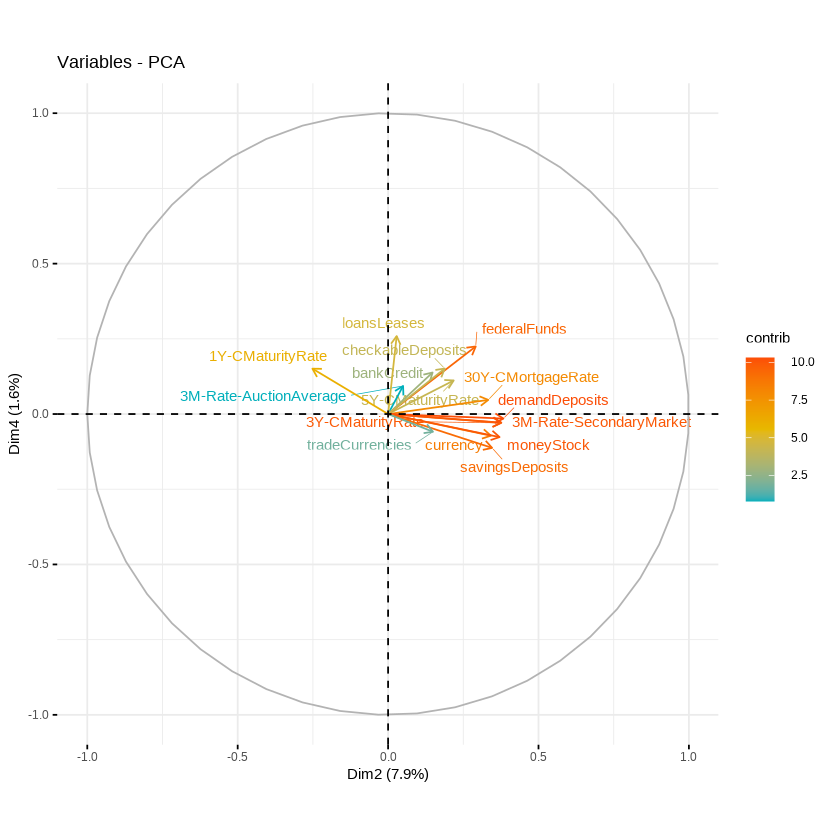

In [61]:
fviz_pca_var(mi.pca,
axes = c(2, 4),
col.var = "contrib",
gradient.cols = c("#00AFBB",
"#E7B800", "#FC4E07"),
repel = TRUE) # Avoid text overlapping

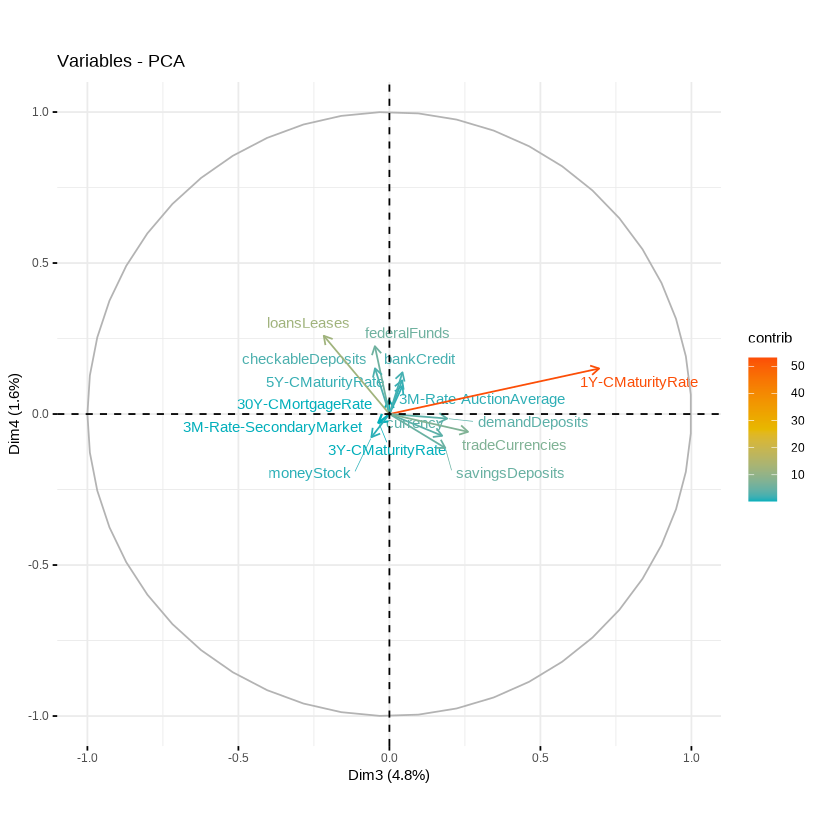

In [62]:
fviz_pca_var(mi.pca,
axes = c(3, 4),
col.var = "contrib",
gradient.cols = c("#00AFBB",
"#E7B800", "#FC4E07"),
repel = TRUE) # Avoid text overlapping

De este modo podemos ver como algunas de las variables que mas podria interesarnos elegir es 1Y-Credit Maturity Rate y LoanLeases, pues ambas nos aportan mucha información sobre una parte de los datos que las más evidentes no contemplan. Para verlo numericamente podemos sacar un corrplot de las dimensiones y las variables

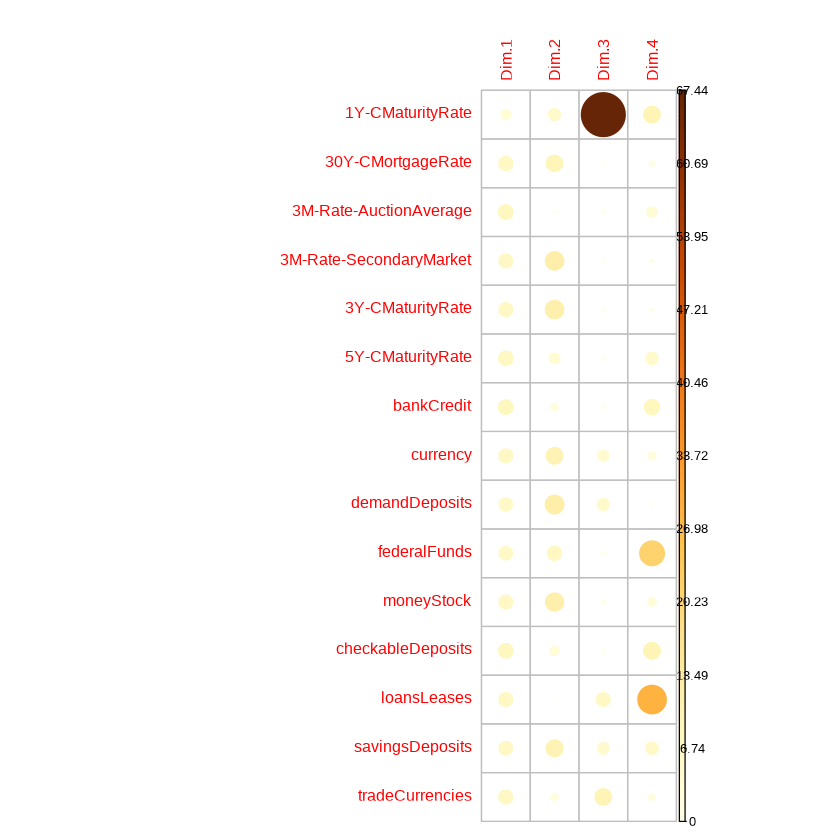

In [56]:
corrplot(mi.pca$var$contrib, is.corr=FALSE)

Aqui observamos como efectivamente las dos variables que hemos propuesto estan fuertemente correladas con las dimensiones 3 y 4 de los datos

# Verificación o rechazo de hipotesis

Recordando las hipotesis que especificamos

# Selección de variables y transformación de los datos

Por pura especificación del trabajo de regresión se nos pide que nos quedemos con las 5 Mejores variables que podamos, y viendo las correlaciones entre la salida y el estudio de la explicabilidad que hemos hecho podemos permitirnos seleccionar simplemente 5 caracteristicas. Lo que si es importante es que las caracteristicas que seleccionemos esten en un dominio similar porque sabemos que vamos a utilizar regresion lineal que es un metodo sensible a esas diferencias. Partiendo de ese razonamiento vamos a seleccionar las siguientes variables

- LoanLeases
- 1YCreditMaturityRate
- 3MRateAuction-Average
- 3MRate-SecondaryMarket
- Moneystock
  
De este modo tenemos una combinación de variables que explican bien el dataset y evitamos caer en demasiada redundancia. Sin embargo si recordamos el dominio de estas variables vemos que es muy distinto así que tenemos que aplicar una transformación de escalado. Como por ejemplo la Z-score

In [64]:
names(data)

[1] "1Y-CMaturityRate"        "30Y-CMortgageRate"      
 [3] "3M-Rate-AuctionAverage"  "3M-Rate-SecondaryMarket"
 [5] "3Y-CMaturityRate"        "5Y-CMaturityRate"       
 [7] "bankCredit"              "currency"               
 [9] "demandDeposits"          "federalFunds"           
[11] "moneyStock"              "checkableDeposits"      
[13] "loansLeases"             "savingsDeposits"        
[15] "tradeCurrencies"         "1MonthCDRate"

In [7]:
library(caret)

final_values <- data %>% select(loansLeases,`1Y-CMaturityRate`,`3M-Rate-SecondaryMarket`,`3M-Rate-AuctionAverage`,moneyStock,) %>% preProcess(method=c("center","scale"))
final_dataset <- predict(final_values, data %>% select(loansLeases,`1Y-CMaturityRate`,`3M-Rate-SecondaryMarket`,`3M-Rate-AuctionAverage`,moneyStock)) %>% cbind(data$`1MonthCDRate`)
names(final_dataset)[6]<-"1MonthCDRate"

# Regresion

In [8]:
final_dataset

loansLeases,1Y-CMaturityRate,3M-Rate-SecondaryMarket,3M-Rate-AuctionAverage,moneyStock,1MonthCDRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13122972,-0.36358737,0.2906893,0.003092926,0.20360950,8.30
1.59106497,-0.75449523,-0.9651128,-0.632284246,-1.07088345,4.02
-0.06040151,0.01301647,-0.4302968,-0.453161958,-0.37570548,5.99
-1.52596659,0.35956109,1.2012305,2.196496035,1.39332465,11.55
-0.78363432,2.11757542,0.0977494,0.621571769,0.09339836,7.80
0.56415077,-0.08220557,-0.5860027,-1.169651109,-0.51134996,5.55
0.73222601,-0.72685458,-1.1005092,-0.554551932,-1.10196864,3.90
-1.66284604,-0.32053706,1.0861435,0.905463696,0.75466521,10.44
-0.96125928,2.73126691,0.4430104,0.848009378,0.29403916,8.43


In [9]:
require(ISLR)
require(MASS)

Loading required package: ISLR

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




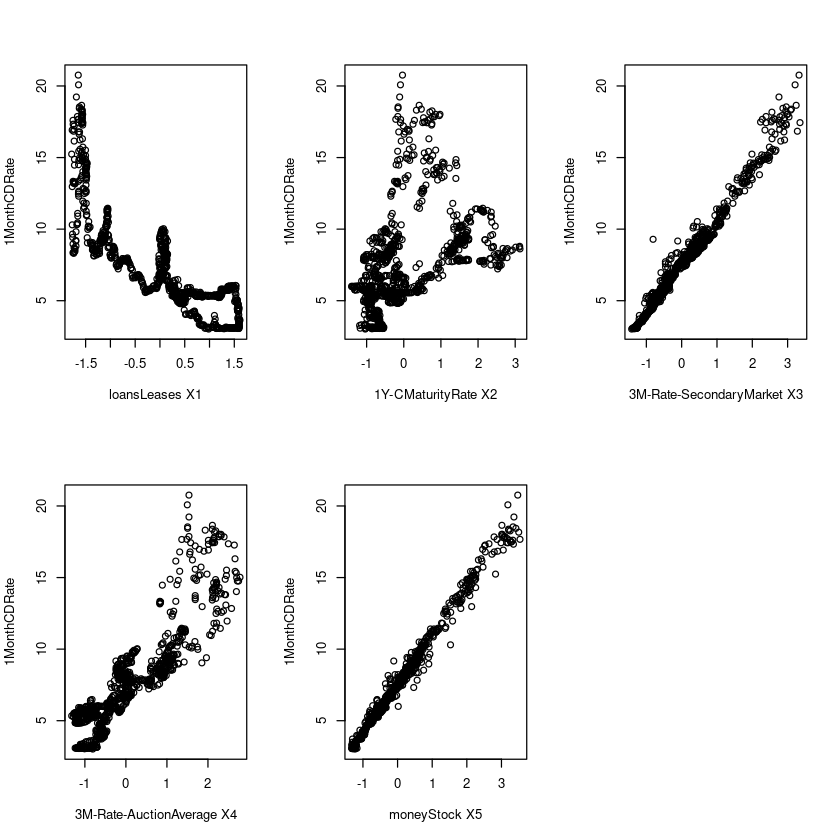

In [10]:
temp <- final_dataset
plotY <- function(x, y) {
    plot(temp[, y] ~ temp[, x],
        xlab = paste(names(temp)[x], " X", x, sep = ""),
        ylab = names(temp)[y]
    )
}
par(mfrow = c(2, 3)) # Si margin too large => (2,3)
x <- sapply(1:(dim(temp)[2] - 1), plotY, dim(temp)[2])
par(mfrow = c(1, 1))

In [12]:
fit1=lm(`1MonthCDRate`~moneyStock,data=final_dataset)

In [13]:
summary(fit1)


Call:
lm(formula = `1MonthCDRate` ~ moneyStock, data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35798 -0.11996 -0.01642  0.10068  2.01779 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.52194    0.01078   698.0   <2e-16 ***
moneyStock   3.35915    0.01078   311.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.349 on 1047 degrees of freedom
Multiple R-squared:  0.9893,	Adjusted R-squared:  0.9893 
F-statistic: 9.707e+04 on 1 and 1047 DF,  p-value: < 2.2e-16


In [14]:
fit1=lm(`1MonthCDRate`~.,data=final_dataset)

In [15]:
summary(fit1)


Call:
lm(formula = `1MonthCDRate` ~ ., data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69495 -0.12485 -0.03459  0.07756  1.97764 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.522e+00  8.467e-03 888.370  < 2e-16 ***
loansLeases               -7.559e-05  2.235e-02  -0.003  0.99730    
`1Y-CMaturityRate`        -4.157e-02  1.385e-02  -3.001  0.00275 ** 
`3M-Rate-SecondaryMarket`  1.297e+00  5.149e-02  25.196  < 2e-16 ***
`3M-Rate-AuctionAverage`  -6.265e-02  2.526e-02  -2.480  0.01328 *  
moneyStock                 2.156e+00  5.110e-02  42.189  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2742 on 1043 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 3.158e+04 on 5 and 1043 DF,  p-value: < 2.2e-16


In [16]:
fit2<-lm(`1MonthCDRate`~.-loansLeases,data=final_dataset)
summary(fit2)


Call:
lm(formula = `1MonthCDRate` ~ . - loansLeases, data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69490 -0.12487 -0.03462  0.07759  1.97766 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.521945   0.008463 888.796  < 2e-16 ***
`1Y-CMaturityRate`        -0.041543   0.011904  -3.490 0.000504 ***
`3M-Rate-SecondaryMarket`  1.297366   0.051271  25.304  < 2e-16 ***
`3M-Rate-AuctionAverage`  -0.062620   0.023838  -2.627 0.008741 ** 
moneyStock                 2.156020   0.049539  43.521  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2741 on 1044 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 3.951e+04 on 4 and 1044 DF,  p-value: < 2.2e-16


In [18]:
fit3<-lm(`1MonthCDRate`~.-loansLeases-`3M-Rate-AuctionAverage`,data=final_dataset)
summary(fit3)


Call:
lm(formula = `1MonthCDRate` ~ . - loansLeases - `3M-Rate-AuctionAverage`, 
    data = final_dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7310 -0.1269 -0.0325  0.0872  1.9710 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.521945   0.008487 886.297  < 2e-16 ***
`1Y-CMaturityRate`        -0.059685   0.009723  -6.138 1.18e-09 ***
`3M-Rate-SecondaryMarket`  1.265659   0.049971  25.328  < 2e-16 ***
moneyStock                 2.139829   0.049293  43.410  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2749 on 1045 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 5.238e+04 on 3 and 1045 DF,  p-value: < 2.2e-16


In [20]:
fit4<-lm(`1MonthCDRate`~.-loansLeases-`3M-Rate-AuctionAverage`+I(`1Y-CMaturityRate`^2),data=final_dataset)
summary(fit4)


Call:
lm(formula = `1MonthCDRate` ~ . - loansLeases - `3M-Rate-AuctionAverage` + 
    I(`1Y-CMaturityRate`^2), data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72605 -0.11876 -0.03743  0.08140  1.99189 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.544041   0.012345 611.096   <2e-16 ***
`1Y-CMaturityRate`        -0.031818   0.014916  -2.133   0.0331 *  
`3M-Rate-SecondaryMarket`  1.287710   0.050651  25.423   <2e-16 ***
moneyStock                 2.109362   0.050711  41.596   <2e-16 ***
I(`1Y-CMaturityRate`^2)   -0.022117   0.008993  -2.459   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2742 on 1044 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 3.948e+04 on 4 and 1044 DF,  p-value: < 2.2e-16


In [22]:
fit5<-lm(`1MonthCDRate`~.-loansLeases-`3M-Rate-AuctionAverage`+I(moneyStock^2),data=final_dataset)
summary(fit5)


Call:
lm(formula = `1MonthCDRate` ~ . - loansLeases - `3M-Rate-AuctionAverage` + 
    I(moneyStock^2), data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.70207 -0.12842 -0.03275  0.09104  1.99024 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.507525   0.010802 695.016  < 2e-16 ***
`1Y-CMaturityRate`        -0.051553   0.010416  -4.949 8.67e-07 ***
`3M-Rate-SecondaryMarket`  1.289077   0.051057  25.248  < 2e-16 ***
moneyStock                 2.093677   0.053678  39.004  < 2e-16 ***
I(moneyStock^2)            0.014434   0.006707   2.152   0.0316 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2744 on 1044 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 3.943e+04 on 4 and 1044 DF,  p-value: < 2.2e-16


In [24]:
fit6<-lm(`1MonthCDRate`~.-loansLeases-`3M-Rate-AuctionAverage`+I(`1Y-CMaturityRate`^(1/2)),data=final_dataset)
summary(fit6)


Call:
lm(formula = `1MonthCDRate` ~ . - loansLeases - `3M-Rate-AuctionAverage` + 
    I(`1Y-CMaturityRate`^(1/2)), data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98420 -0.13624 -0.02085  0.12767  1.65749 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  7.41270    0.07554  98.123   <2e-16 ***
`1Y-CMaturityRate`          -0.08458    0.09076  -0.932    0.352    
`3M-Rate-SecondaryMarket`    1.22882    0.07003  17.546   <2e-16 ***
moneyStock                   2.17477    0.07120  30.544   <2e-16 ***
I(`1Y-CMaturityRate`^(1/2))  0.10970    0.17233   0.637    0.525    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2941 on 336 degrees of freedom
  (708 observations deleted due to missingness)
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9926 
F-statistic: 1.144e+04 on 4 and 336 DF,  p-value: < 2.2e-16


In [25]:
fit7<-lm(`1MonthCDRate`~.-loansLeases-`3M-Rate-AuctionAverage`+I(`1Y-CMaturityRate`*moneyStock),data=final_dataset)
summary(fit7)


Call:
lm(formula = `1MonthCDRate` ~ . - loansLeases - `3M-Rate-AuctionAverage` + 
    I(`1Y-CMaturityRate` * moneyStock), data = final_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73639 -0.12536 -0.03289  0.08366  1.96882 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         7.526683   0.010910 689.872  < 2e-16 ***
`1Y-CMaturityRate`                 -0.058122   0.009985  -5.821 7.78e-09 ***
`3M-Rate-SecondaryMarket`           1.267833   0.050082  25.315  < 2e-16 ***
moneyStock                          2.138202   0.049361  43.317  < 2e-16 ***
I(`1Y-CMaturityRate` * moneyStock) -0.010400   0.015043  -0.691     0.49    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2749 on 1044 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 3.927e+04 on 4 and 1044 DF,  p-value: < 2.2e-16


In [26]:
require(kknn)

Loading required package: kknn


Attaching package: ‘kknn’


The following object is masked from ‘package:caret’:

    contr.dummy




In [30]:
fitknn1 <- kknn(`1MonthCDRate`~.-loansLeases-`3M-Rate-AuctionAverage`,final_dataset,final_dataset)
yprime <- fitknn1$fitted.values
sqrt(sum((final_dataset$`1MonthCDRate`-yprime)^2)/length(yprime)) #RMSE

[1] 0.1144729